In [3]:
import cv2, os
import numpy as np
from matplotlib import pyplot as plt
script_dir = os.getcwd() # Get the directory of the current script

In [4]:
def ipynb_cv_imshow(title, img, cv=True):
    """
    Display an image in a Jupyter Notebook cell.
    """
    if img is None:
        print("Image not found or could not be read.")
        return
    plt.figure(figsize=(10, 10))
    plt.title(title)
    if cv:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()

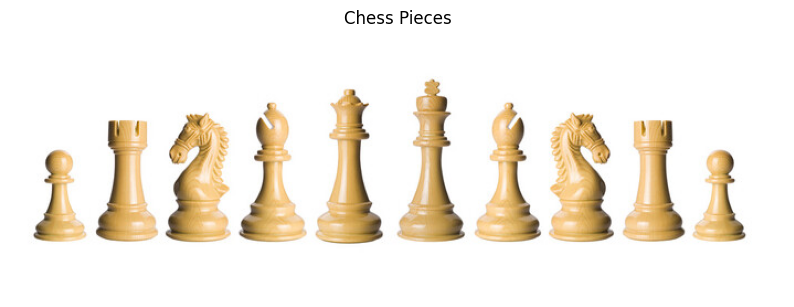

In [5]:
query_img = cv2.imread(os.path.join(script_dir, 'Chess_Pieces.jpg'), cv2.IMREAD_COLOR)
ipynb_cv_imshow('Chess Pieces', query_img)

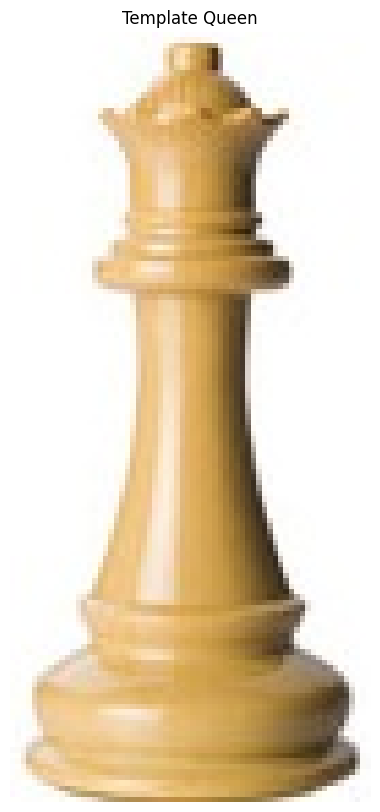

In [6]:
template_img = cv2.imread(os.path.join(script_dir, 'Queen.jpg'), cv2.IMREAD_COLOR)
ipynb_cv_imshow('Template Queen', template_img)

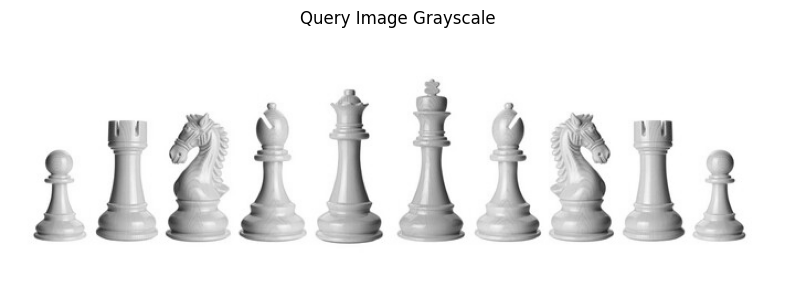

In [7]:
query_gray = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
ipynb_cv_imshow('Query Image Grayscale', query_gray)

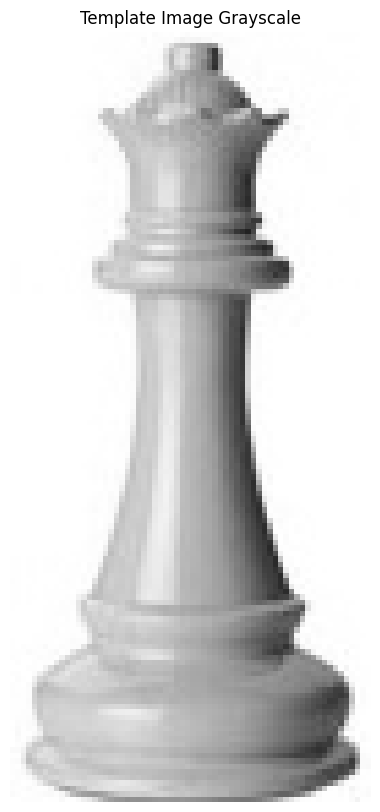

In [8]:
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
ipynb_cv_imshow('Template Image Grayscale', template_gray)

In [9]:
w, h = template_gray.shape[::-1]
print(f'Template size: {w}x{h}')

Template size: 66x141


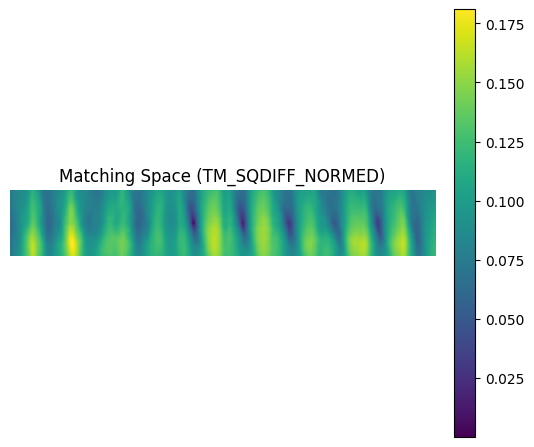

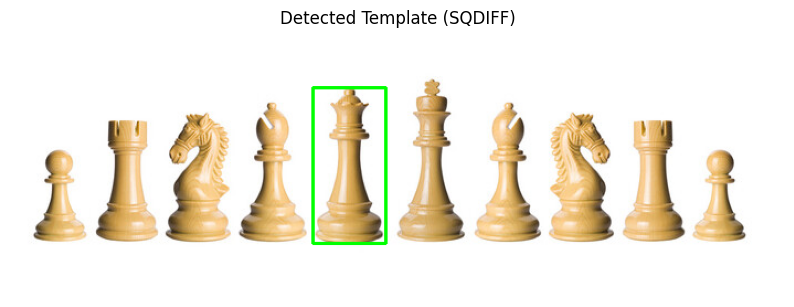

In [10]:
result_sqdiff = cv2.matchTemplate(query_gray, template_gray, cv2.TM_SQDIFF_NORMED)
min_val, _, min_loc, _ = cv2.minMaxLoc(result_sqdiff)
top_left_sqdiff = min_loc
# ipynb_cv_imshow('Template Matching Result (SQDIFF)', result_sqdiff, cv=False)
plt.figure(figsize=(6, 6))
plt.title('Matching Space (TM_SQDIFF_NORMED)')
plt.imshow(result_sqdiff, cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.show()
img_sqdiff = query_img.copy()
cv2.rectangle(img_sqdiff, top_left_sqdiff, (top_left_sqdiff[0] + w, top_left_sqdiff[1] + h), (0, 255, 0), 2)
ipynb_cv_imshow('Detected Template (SQDIFF)', img_sqdiff)

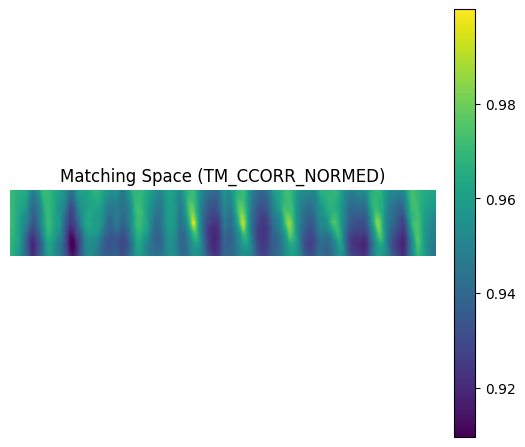

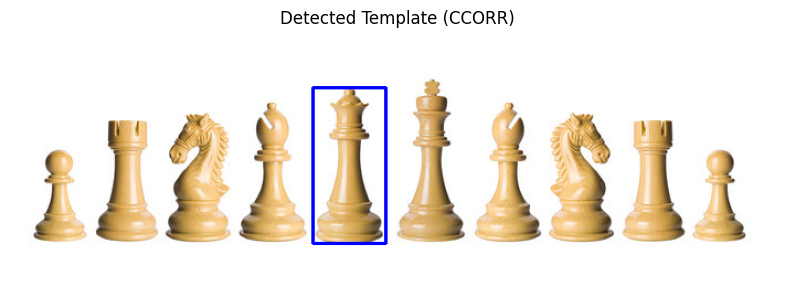

In [11]:
result_ccorr = cv2.matchTemplate(query_gray, template_gray, cv2.TM_CCORR_NORMED)
_, max_val, _, max_loc = cv2.minMaxLoc(result_ccorr)
top_left_ccorr = max_loc
# ipynb_cv_imshow('Template Matching Result (CCORR)', result_ccorr, cv=False)
plt.figure(figsize=(6, 6))
plt.title('Matching Space (TM_CCORR_NORMED)')
plt.imshow(result_ccorr, cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis('off')
plt.show()
img_ccorr = query_img.copy()
cv2.rectangle(img_ccorr, top_left_ccorr, (top_left_ccorr[0] + w, top_left_ccorr[1] + h), (255, 0, 0), 2)
ipynb_cv_imshow('Detected Template (CCORR)', img_ccorr)

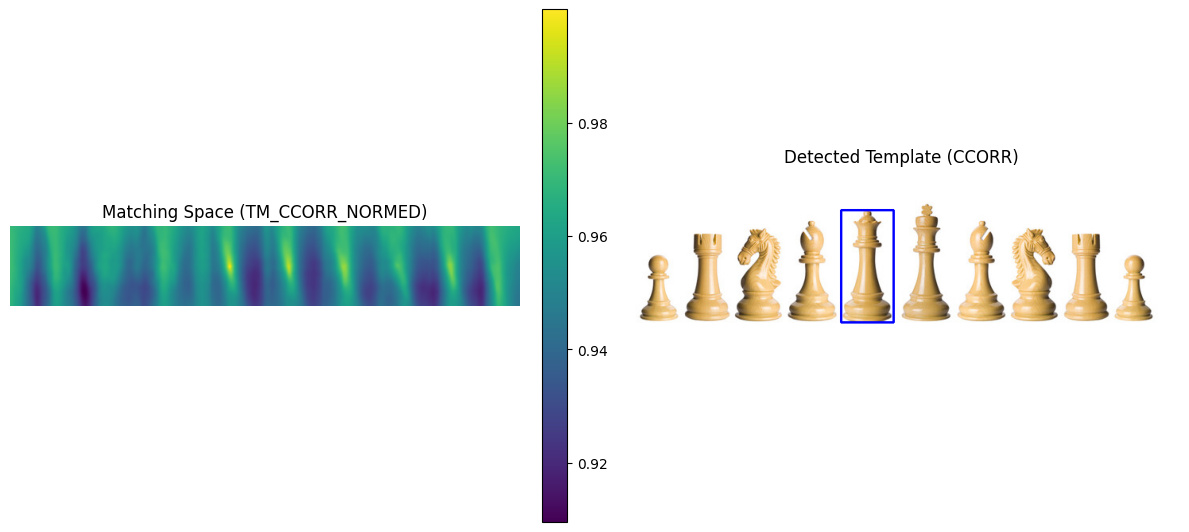

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 1. Matching space (heatmap)
im = axs[0].imshow(result_ccorr, cmap='viridis')
axs[0].set_title('Matching Space (TM_CCORR_NORMED)')
axs[0].axis('off')
plt.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)

# 2. Detected location
if img_ccorr.shape[2] == 3:
    axs[1].imshow(cv2.cvtColor(img_ccorr, cv2.COLOR_BGR2RGB))
else:
    axs[1].imshow(img_ccorr, cmap='gray')
axs[1].set_title('Detected Template (CCORR)')
axs[1].axis('off')

plt.tight_layout()
plt.show()
